[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


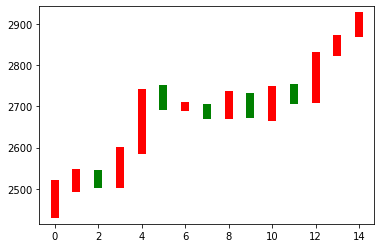

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

date = np.linspace(1, 15, 15)

end_price = np.array(
    [2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08]
)
begin_price = np.array(
    [2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])

print(date)

# 定义一个画布
plt.figure()
for i in range(0, 15):
    # 1 柱状图
    date_one = np.zeros([2])
    date_one[0] = i
    date_one[1] = i

    price = np.zeros([2])
    price[0] = begin_price[i]
    price[1] = end_price[i]

    if end_price[i] > begin_price[i]:
        plt.plot(date_one, price, 'r', lw=8)
    else:
        plt.plot(date_one, price, 'g', lw=8)
plt.show()

pred_price : [2511.89331055]  ，end_price ： 2511.9 , 差值:  [-0.00668945]
pred_price : [2538.26464844]  ，end_price ： 2538.26 , 差值:  [0.00464844]
pred_price : [2510.68432617]  ，end_price ： 2510.68 , 差值:  [0.00432617]
pred_price : [2591.6640625]  ，end_price ： 2591.66 , 差值:  [0.0040625]
pred_price : [2732.98388672]  ，end_price ： 2732.98 , 差值:  [0.00388672]
pred_price : [2701.69482422]  ，end_price ： 2701.69 , 差值:  [0.00482422]
pred_price : [2701.28344727]  ，end_price ： 2701.29 , 差值:  [-0.00655273]
pred_price : [2678.67456055]  ，end_price ： 2678.67 , 差值:  [0.00456055]
pred_price : [2726.4934082]  ，end_price ： 2726.5 , 差值:  [-0.0065918]
pred_price : [2681.4934082]  ，end_price ： 2681.5 , 差值:  [-0.0065918]
pred_price : [2739.16674805]  ，end_price ： 2739.17 , 差值:  [-0.00325195]
pred_price : [2715.07226562]  ，end_price ： 2715.07 , 差值:  [0.00226562]
pred_price : [2823.58081055]  ，end_price ： 2823.58 , 差值:  [0.00081055]
pred_price : [2864.90209961]  ，end_price ： 2864.9 , 差值:  [0.00209961]
pred_price 

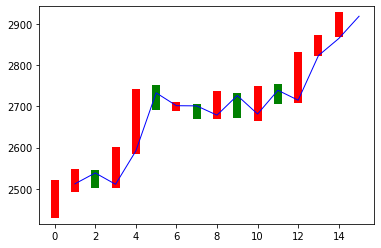

In [23]:
# A 为输入层， B 为隐藏层， C 为输出层
# A -> B
# A(15 × 1) * w1(1 × 10) + b1(1 × 10) = B(15 × 10)
# B(15 × 11) * w2(10 × 15) + b2(15 × 1) = C(15 × 11)
date_normal = np.zeros([15, 1])
price_nornal = np.zeros([15, 1])

for i in range(0, 15):
    date_normal[i, 0] = i / 14.0
    price_nornal[i, 0] = end_price[i] / 3000

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])
# B 层
w1 = tf.Variable(tf.random_uniform([1, 10], 0, 1))
b1 = tf.Variable(tf.random_uniform([1, 10]))
# 使用激励函数
layber_1 = tf.nn.relu(tf.matmul(x, w1) + b1)

# C 层
w2 = tf.Variable(tf.random_uniform([10, 1], 0, 1))
b2 = tf.Variable(tf.random_uniform([15, 1]))
# 使用激励函数
layber_2 = tf.nn.relu(tf.matmul(layber_1, w2) + b2)

# 计算差值(标准差)
loss = tf.reduce_mean(tf.square(y - layber_2))

# 步长
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0, 1000):
        sess.run(train_step, feed_dict={x:date_normal, y:price_nornal})
    
    pred = sess.run(layber_2, feed_dict={x:date_normal})
    pred_price = np.zeros([15, 1])
    for i in range (0, 15):
        pred_price[i, 0] = (pred * 3000)[i, 0]

        # 柱状图
        date_one = np.zeros([2])
        date_one[0] = i
        date_one[1] = i

        price = np.zeros([2])
        price[0] = begin_price[i]
        price[1] = end_price[i]

        if end_price[i] > begin_price[i]:
            plt.plot(date_one, price, 'r', lw=8)
        else:
            plt.plot(date_one, price, 'g', lw=8)

    plt.plot(date, pred_price, 'b', lw=1)
    
    for i in range (0, 15):
        print("pred_price :", pred_price[i], " ，end_price ：", end_price[i],", 差值: " , pred_price[i] - end_price[i])
plt.show()
